# 解释模型
## 引入
与机器学习（深度学习）类黑箱模型相比，统计学模型具有更高的解释性。

统计学纲要：

![alt text](image-8.png)

比赛中：
- 描述性统计作用：数据预处理、进行结果分析与政策制定
- 推断性统计作用：建模过程，得出结果

## 统计学基础
- 统计学是一门收集、处理、分析、解释数据并从数据中得出结论的科学。
- 概率论 与 统计学之间的桥梁：大数定律和中心极限定律
- 统计学是对概率论的应用，而应用的核心是用样本来估计总体
利用统计学进行数据分析步骤：

![alt text](image-7.png)

统计学的核心：数据
### 数据
数据是统计学的研究对象，什么是数据呢？可以进行比较、加减乘除等运算的数字是数据，文字也可以是数据，包括图片、视频、音频等等。

数据的计量尺度分类
![alt text](image-11.png)
![alt text](image-12.png)


### 基本概念
#### 总体和样本
![alt text](image-9.png)
#### 参数和统计量
![alt text](image-10.png)

## 描述性统计
五个角度一个方法：
- 总体规模的描述--总量指标
- 对比关系的描述--相对指标
- 集中趋势的描述--平均指标
- 离散程度的描述--变异指标
- 分布形态的描述--偏态与峰态
- 描述性统计图表

### 总量&相对
1. 总量指标: 反映在一定时间、空间条件下某种现象的总体规模、总水平或总成果的统计指标。如: 营业额、利润
2. 相对指标: 两个有相互联系的指标数值之比。如: 目标完成率 = 实际完成/计划完成、占比

### 集中趋势
![alt text](image-13.png)
1. 均值: 描述数据集中所有数值的平均值。可以分为算术平均值、几何平均值、调和平均值，但比赛中一般只涉及算术平均值，np.mean(), df.mean()计算的也是算数平均值
2. 分位数: 根据数据对位置进行划分，处于某些特定位置上的数，最常见的如中位数（二分位数）、四分位数（用于查找异常值）
3. 众数: 描述数据集中出现次数最多的数值。

### 离散程度
定义：反映各变量值远离其中心值的程度，是数据分布的另一个重要特征，从另一个侧面说明了集中趋势测度值的代表程度
1. 极差（range）：一组数据最大值与最小值之差
2. 方差和标准差：标准差 = 方差开平方根
3. 离散系数/变异系数：标准差与均值之比，可以提出数据水平和量纲的影响

### 分布形态
1. 偏态（skewness）：数据分布的偏斜程度，用SK表示，计算公式很多

![alt text](image-14.png)
- 对称分布：均值=中位数=众数
- 左偏分布：均值<中位数<众数
- 右偏分布：均值>中位数>众数
偏态的程度：
- 低度 0 < |SK| <= 0.5
- 中等 0.5 <= |SK| < 1
- 高度 1 < |SK|

2. 峰度（kurtosis）：数据分布的陡峭程度，用K表示，计算公式很多

![alt text](image-15.png)

In [68]:
import pandas as pd

df = pd.read_csv('../数据预处理/data/HousePrice.csv')
df.head(5)

,dist,roomnum,halls,AREA,floor,subway,school,price
0,chaoyang,1,0,46.06,middle,1,0,48850
1,chaoyang,1,1,59.09,middle,1,0,46540
2,haidian,5,2,278.95,high,1,1,71662
3,haidian,3,2,207.00,high,1,1,57972
4,fengtai,2,1,53.32,low,1,1,71268


In [69]:
# dist变量重新编码为中文，比如chaoyang改为朝阳区
district = {
    'chaoyang': '朝阳区',
    'dongcheng': '东城区',
    'xicheng': '西城区',
    'haidian': '海淀区',
    'fengtai': '丰台区',
    'shijingshan': '石景山区',
}

df['district'] = df['dist'].map(district)
df.head()

,dist,roomnum,halls,AREA,floor,subway,school,price,district
0,chaoyang,1,0,46.06,middle,1,0,48850,朝阳区
1,chaoyang,1,1,59.09,middle,1,0,46540,朝阳区
2,haidian,5,2,278.95,high,1,1,71662,海淀区
3,haidian,3,2,207.00,high,1,1,57972,海淀区
4,fengtai,2,1,53.32,low,1,1,71268,丰台区


In [70]:
# 单变量频数
df['district'].value_counts(), df['floor'].value_counts(), df['school'].value_counts()

(district
 丰台区     2947
 海淀区     2919
 朝阳区     2864
 东城区     2783
 西城区     2750
 石景山区    1947
 Name: count, dtype: int64,
 floor
 middle    5580
 high      5552
 low       5078
 Name: count, dtype: int64,
 school
 0    11297
 1     4913
 Name: count, dtype: int64)

<Axes: ylabel='count'>

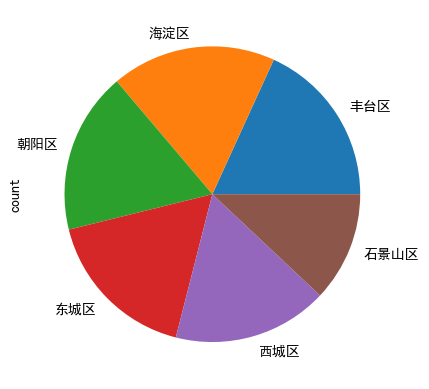

In [4]:
# 绘制饼图看coounts的分布
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus']=False

df['district'].value_counts().plot(kind='pie')

In [71]:
# 连续变量描述
df['price'].mean(), df['price'].median(), df['price'].mode(), df['price'].std(), df['price'].skew(), df['price'].kurtosis()

(np.float64(61151.810919185686),
 np.float64(57473.0),
 0    50000
 Name: price, dtype: int64,
 np.float64(22293.358147328723),
 np.float64(0.6794935869486859),
 np.float64(-0.019305888544372873))

In [6]:
# 也可以和在一起写，但无法求众数，原因：连续性数据，求众数意义不大
df['price'].agg(['mean', 'median', 'std', 'skew', 'kurtosis'])

mean        61151.810919
median      57473.000000
std         22293.358147
skew            0.679494
kurtosis       -0.019306
Name: price, dtype: float64

In [7]:
# 1%位数 中位数 99%位数 -- 可以用于异常值监测
df['price'].quantile([0.01, 0.5, 0.99])

0.01     27104.45
0.50     57473.00
0.99    119996.85
Name: price, dtype: float64

<Axes: >

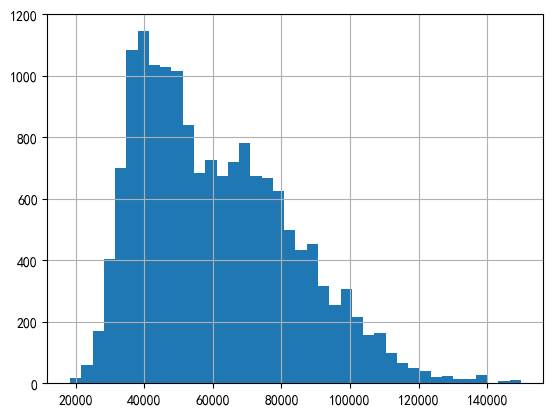

In [8]:
# 频率分布直方图
df['price'].hist(bins=40)

In [72]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
roomnum,16210.0,2.166194,0.809907,1.00,2.00,2.00,3.0000,5.0
halls,16210.0,1.221407,0.532048,0.00,1.00,1.00,2.0000,3.0
AREA,16210.0,91.746598,44.000768,30.06,60.00,78.83,110.5175,299.0
subway,16210.0,0.827822,0.377546,0.00,1.00,1.00,1.0000,1.0
school,16210.0,0.303085,0.459606,0.00,0.00,0.00,1.0000,1.0
price,16210.0,61151.810919,22293.358147,18348.00,42812.25,57473.00,76099.7500,149871.0


### 表分析
一般可能不会展示在论文中，但是可以帮助了解关系

In [9]:
sub_sch = pd.crosstab(df['district'],df['school'])
sub_sch

school,0,1
district,,
东城区,1508,1275
丰台区,2853,94
朝阳区,2267,597
海淀区,1533,1386
石景山区,1929,18
西城区,1207,1543


<Axes: xlabel='district'>

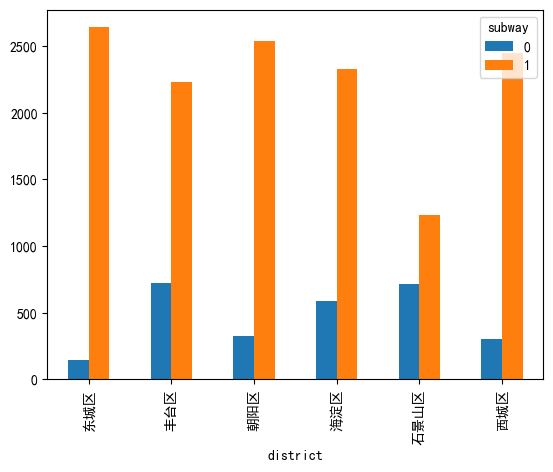

In [12]:
pd.crosstab(df.district, df.subway).plot(kind="bar")

In [14]:
t1 = pd.crosstab(df.district, df.school)
type(t1)

pandas.core.frame.DataFrame

In [15]:
# 与numpy中求sum类似，但是dataframe可以生成新的一列
sub_sch = pd.crosstab(df['district'], df['school'])
sub_sch['sum1'] = sub_sch.sum(axis=1)
sub_sch.head()

school,0,1,sum1
district,,,
东城区,1508,1275,2783
丰台区,2853,94,2947
朝阳区,2267,597,2864
海淀区,1533,1386,2919
石景山区,1929,18,1947


In [18]:
a = sub_sch.div(sub_sch['sum1'], axis=0)
a

school,0,1,sum1
district,,,
东城区,0.541861,0.458139,1.0
丰台区,0.968103,0.031897,1.0
朝阳区,0.791550,0.208450,1.0
海淀区,0.525180,0.474820,1.0
石景山区,0.990755,0.009245,1.0
西城区,0.438909,0.561091,1.0


<Axes: xlabel='district'>

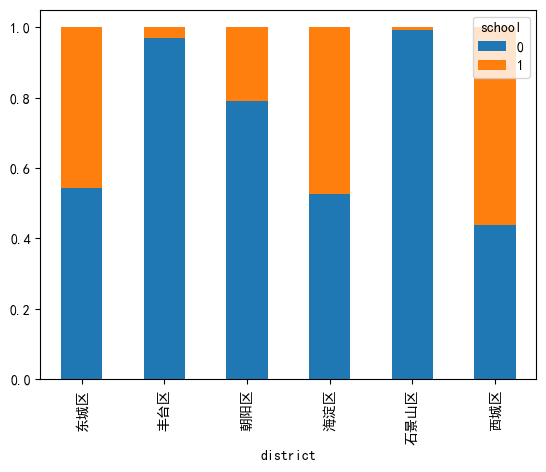

In [19]:
a[[0, 1]].plot(kind='bar', stacked=True)

<Axes: xlabel='district', ylabel='price'>

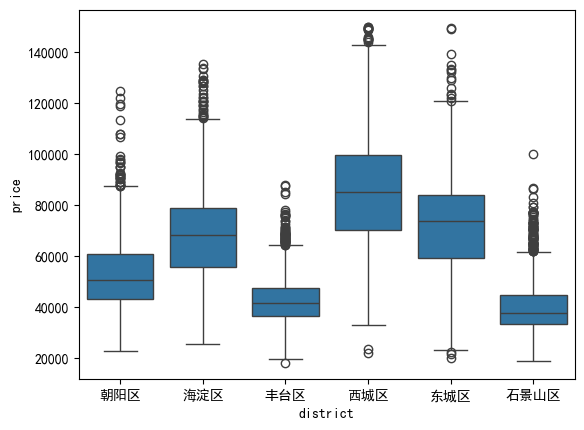

In [30]:
sns.boxplot(x='district', y='price', data=df)

In [32]:
# 双轴对比图
gdp = pd.read_csv('../数据预处理/data/gdp_gdpcr.csv')
gdp.head()

,year,GDP,GDPCR
0,2000,100280.1,8.5
1,2001,110863.1,8.3
2,2002,121717.4,9.1
3,2003,137422.0,10.0
4,2004,161840.2,10.1


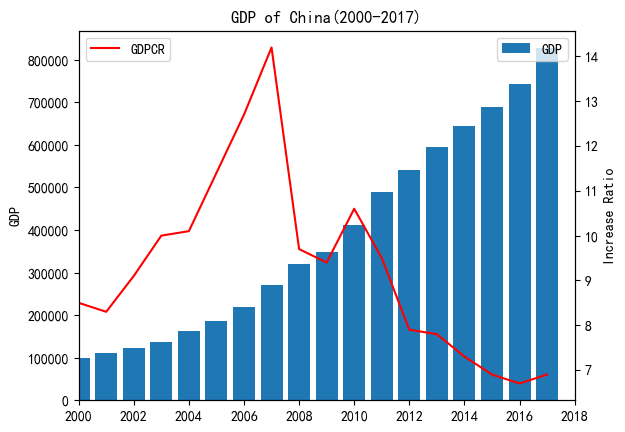

In [42]:
x = list(gdp['year'])
GDP = list(gdp['GDP'])
GDPCR = list(gdp['GDPCR'])
fig = plt.figure()

ax1 = fig.add_subplot(111)
ax1.bar(x, GDP)
ax1.set_ylabel('GDP')
ax1.set_title("GDP of China(2000-2017)")
ax1.set_xlim(2000,2018)
ax1.legend(['GDP'], loc='upper right')

ax2 = ax1.twinx()
ax2.plot(x, GDPCR, 'r')
ax2.set_ylabel('Increase Ratio')
ax2.set_xlabel('Year')
ax2.legend(['GDPCR'], loc='upper left')

## 相关性分析
![alt text](image-16.png)

如何展开相关性分析？
- 相关关系的描述 —— 散点图
- 相关关系的度量 —— 协方差和相关系数

### 散点图


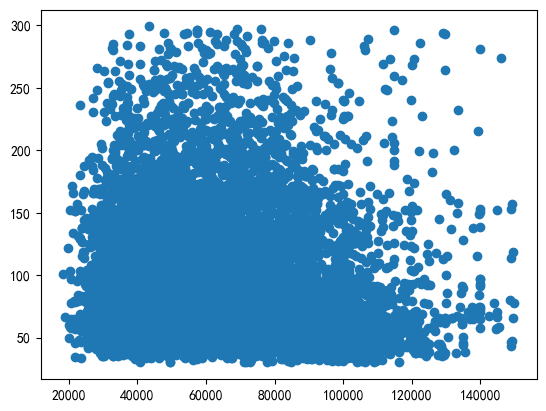

In [3]:
# 绘制price和area的散点图(简易版)
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus']=False

plt.scatter(df['price'], df['AREA'])
plt.show()

<Axes: xlabel='price', ylabel='AREA'>

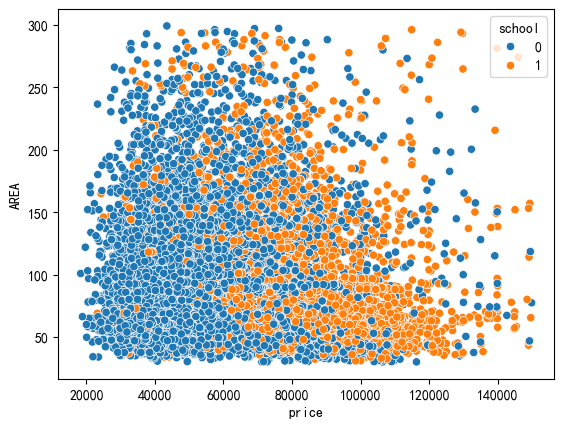

In [29]:
# 利用 sns 
sns.scatterplot(data=df, x='price', y='AREA', hue='school')

In [43]:
import pandas as pd
import numpy as np

mean_param = [0, 1] # X的均值为0 Y的均值为1
cov_param = [[1, 0.5], # X的方差为1 XY的协方差为0.5
             [0.5, 1]]  # XY的协方差为0.5 Y的方差为1
data = np.random.multivariate_normal(mean_param, cov_param, 1000)
data = pd.DataFrame(data, columns=['X', 'Y'])
data.head()


,X,Y
0,0.251155,1.307141
1,1.544694,3.435432
2,0.662032,-0.529028
3,-1.446316,0.944508
4,2.274306,1.951167


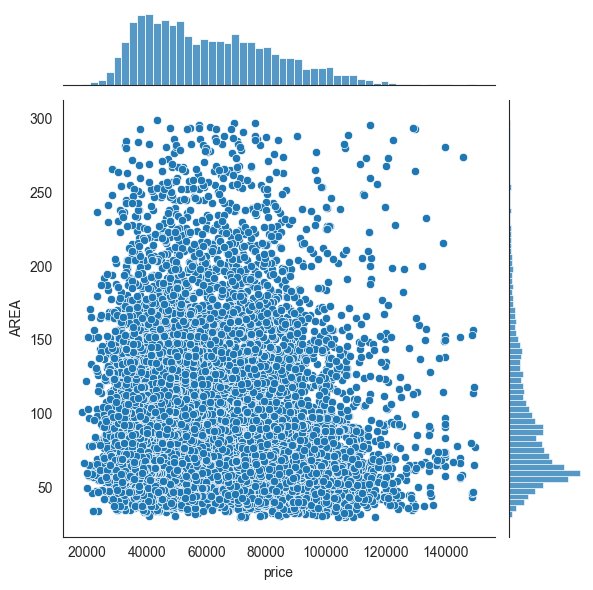

In [45]:
sns.set_style("white")
sns.jointplot(x="price", y="AREA", data=df)

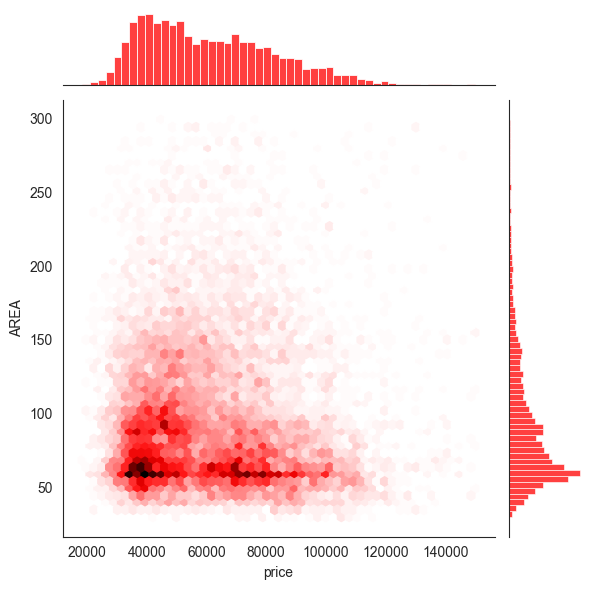

In [46]:
sns.jointplot(x="price", y="AREA", data=df, kind='hex', color='r')

### 协方差

（还记得样本和总体嘛？因为一般很难获得总体，所以下面的协方差和相关系数都是样本的，区别就是除以n还是n-1）
![alt text](image-18.png)
- 协方差的大小和变量的量纲有关，因此不能反映相关性的大小，只能反映方向

### 相关系数 —— pearson
![alt text](image-21.png)

一些理解误区
![alt text](image-22.png)

总结：
- 计算相关系数前，一定要绘制散点图，判断是否存在线性关系
- 如果两个变量本身是线性关系，那么皮尔逊相关系数绝对值就代表了相关性强弱
- 但如果不确定两个变量是什么关系，那不能用皮尔逊相关系数衡量相关性

In [47]:
import pandas as pd
from scipy.stats import pearsonr

df = pd.read_csv('../数据预处理/data/HousePrice.csv')
df.head(5)

p_corr, _ = pearsonr(df['price'], df['AREA'])
p_corr

np.float64(-0.07395474555491167)

### 相关系数 —— Spearman
斯皮尔曼相关系数被定义为等级之间的皮尔逊相关系数

![alt text](image-23.png)
- 如果有的数值相同，则将他们所在的位置取算术平均值，比如Y中出现了两个10，他们占据的位置是4和5，则取(4+5)/2=4.5

![alt text](image-24.png)

In [48]:
from scipy.stats import spearmanr

# 计算'AREA'和'price'之间的斯皮尔曼相关系数
spearman_corr, _ = spearmanr(df['AREA'], df['price'])
spearman_corr

np.float64(-0.1146280494187129)

### 相关系数的选择
![alt text](image-17.png)

### 多变量相关关系

散点矩阵 热力图

In [73]:
import pandas as pd

data = pd.read_excel("../数据预处理/data/1999城镇居民家庭平均每人全年消费性支出.xlsx")
data.head()

,省份,食品,衣着,家庭设备,医疗,交通,娱乐,居住,杂项
0,北京,2959.19,730.79,749.41,513.34,467.87,1141.82,478.42,457.64
1,天津,2459.77,495.47,697.33,302.87,284.19,735.97,570.84,305.08
2,河北,1495.63,515.90,362.37,285.32,272.95,540.58,364.91,188.63
3,山西,1406.33,477.77,290.15,208.57,201.50,414.72,281.84,212.10
4,内蒙古,1303.97,524.29,254.83,192.17,249.81,463.09,287.87,192.96


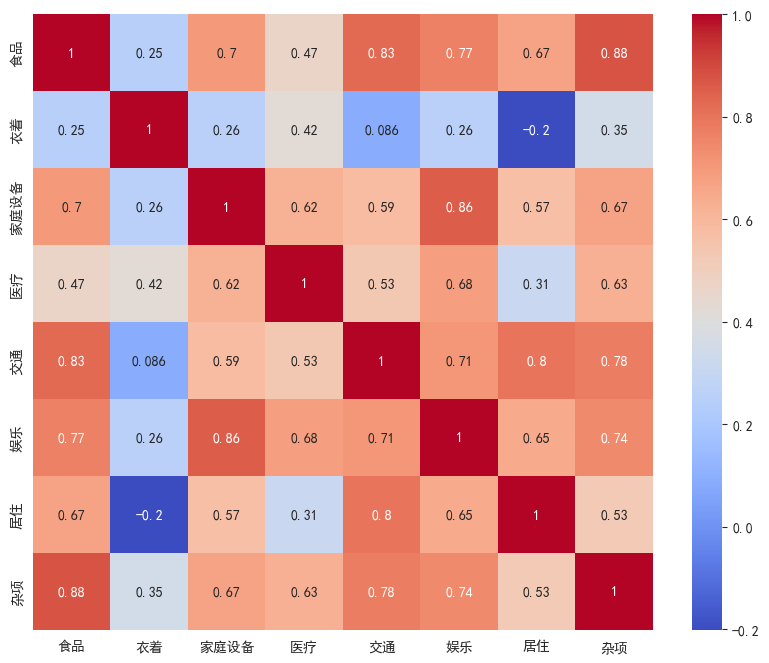

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus']=False

X = data.iloc[:, 1:]
corr_matrix = X.corr()
corr_matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

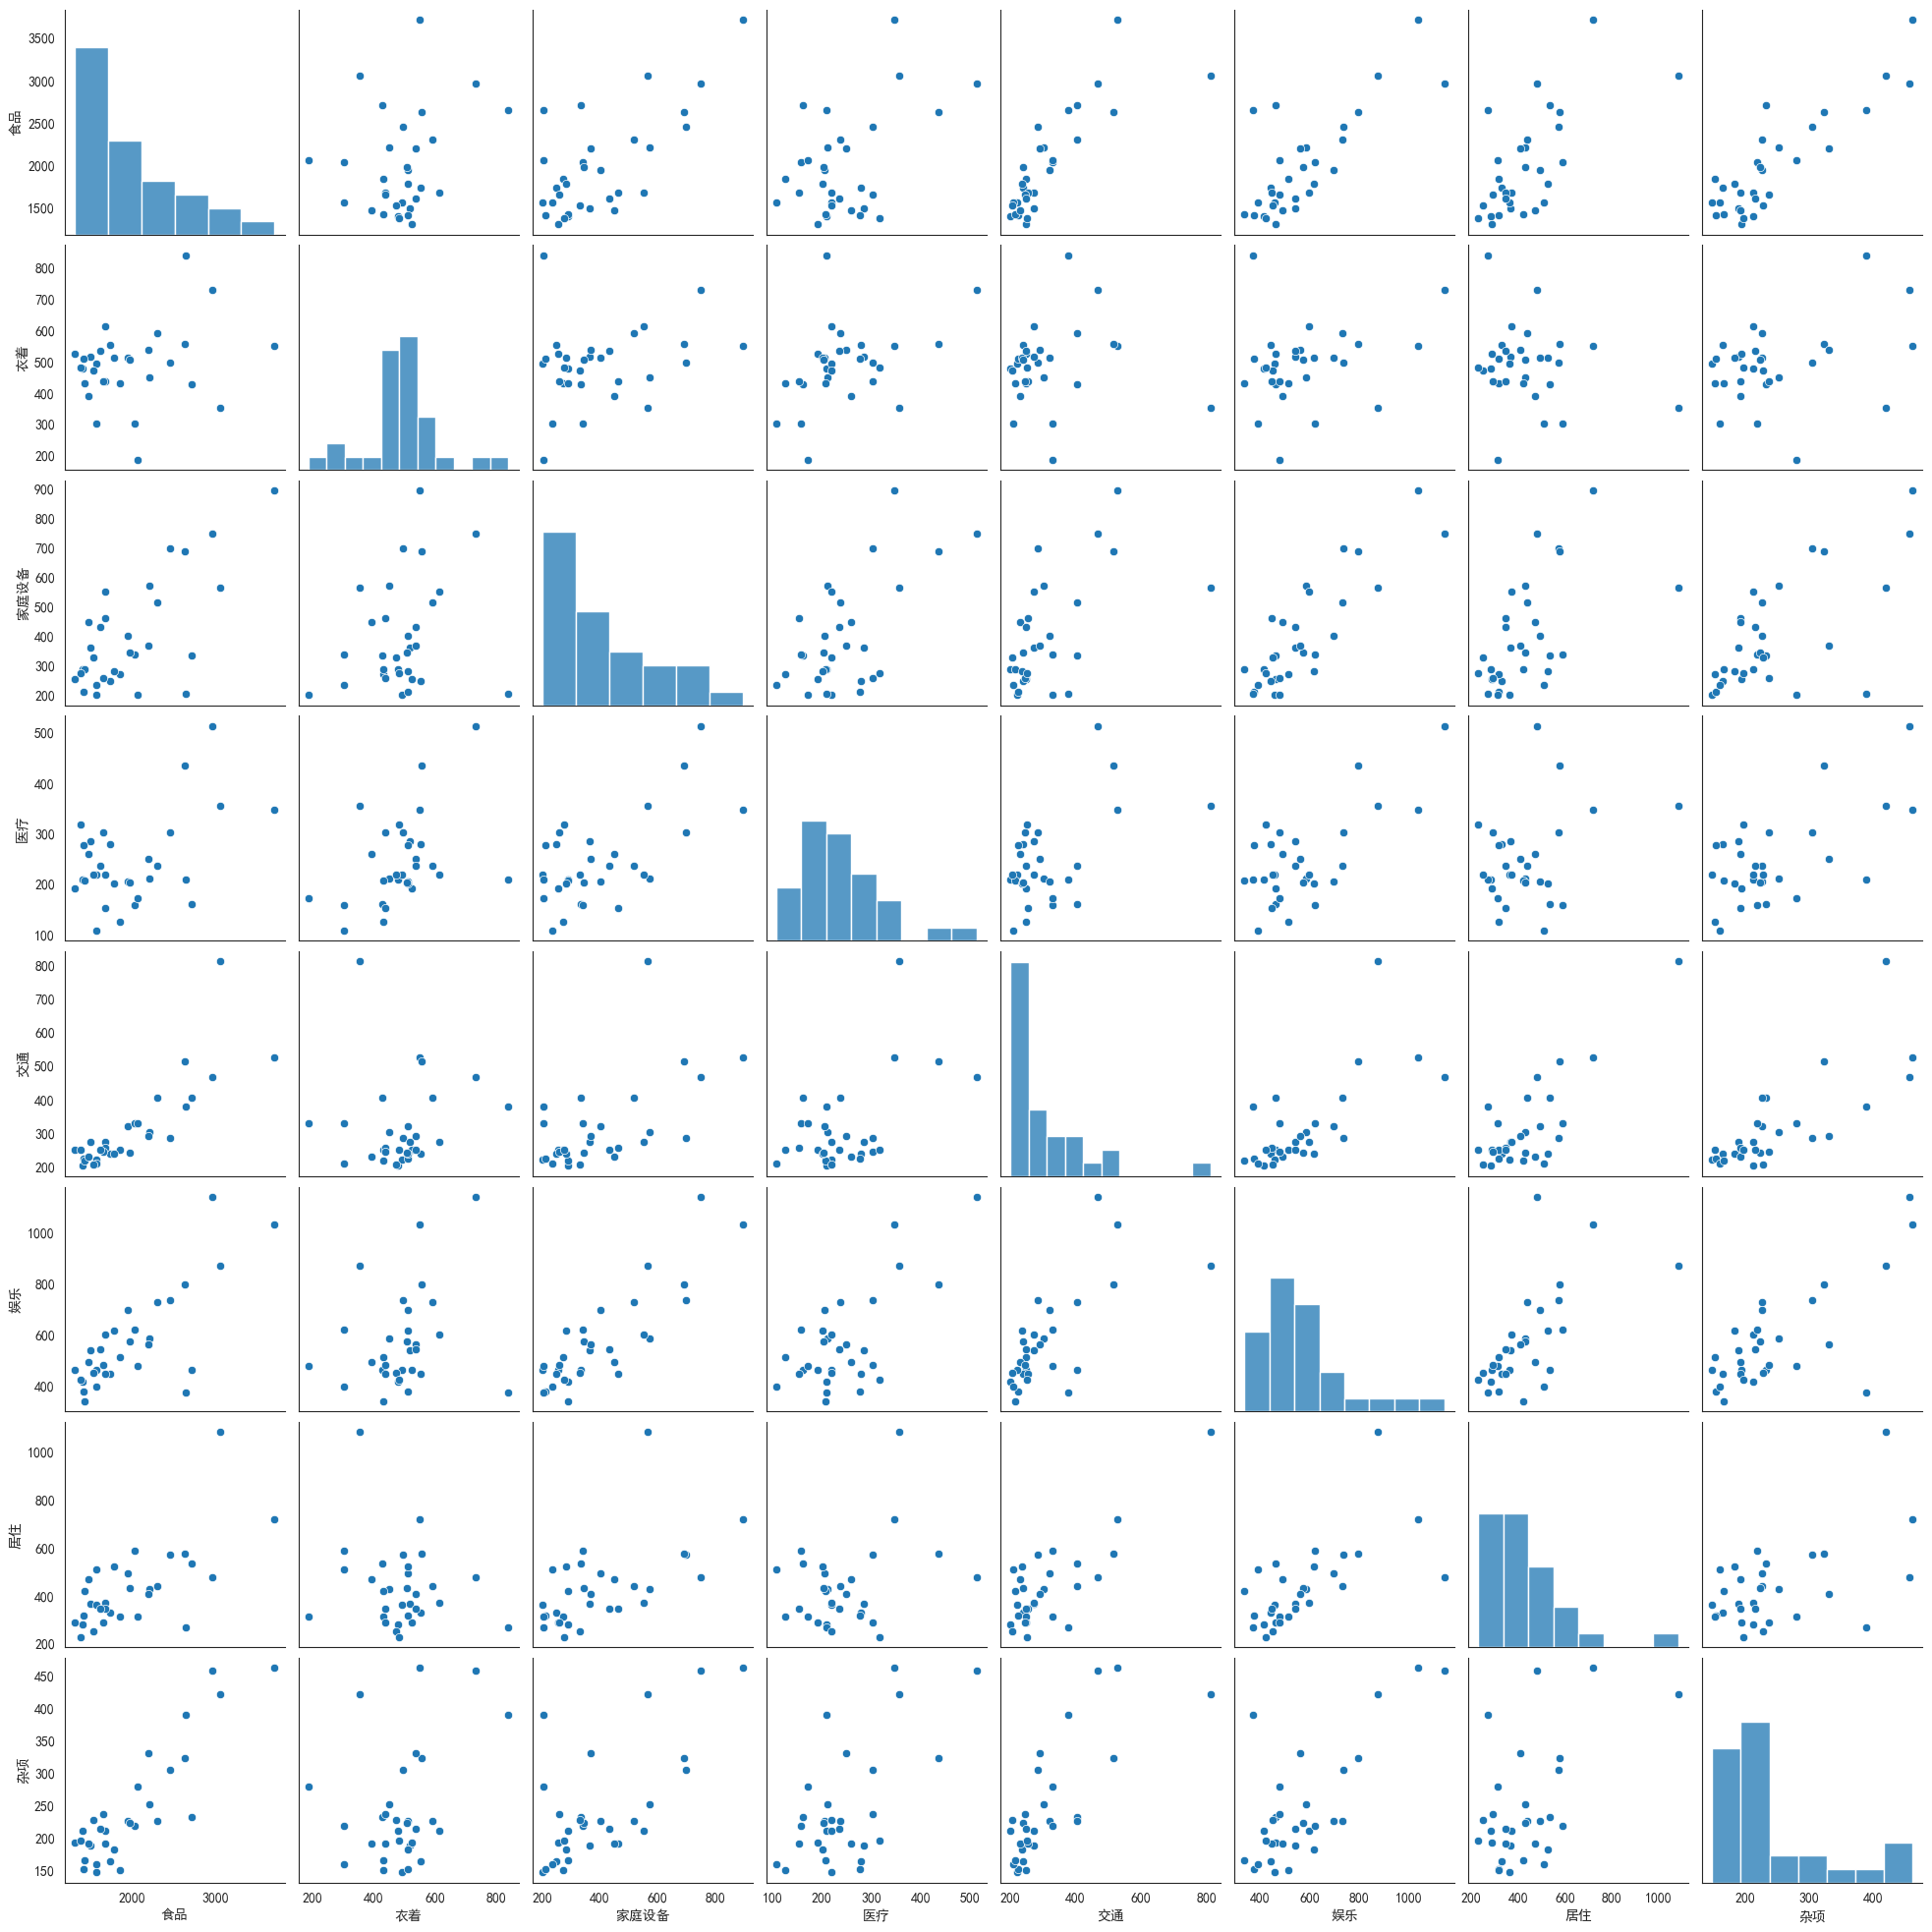

In [ ]:
sns.pairplot(data=X)

## 主成分分析（Principal Component Analysis, PCA）
主成分分析是一种降维算法，它能将多个指标转换为少数几个主成分，这些主成分是原始变量的线性组合，且彼此之间互不相关，其能反映出原始数据的大部分信息。一般来说当研究的问题涉及到多变量且变量之间存在很强的**相关性**时我们可考虑使用主成分分析的方法来对数据进行**简化，降维**。
### 引入
![alt text](image-25.png)
![alt text](image-26.png)

#### 思想
![alt text](image-29.png)
- 构造输入变量的**少数**线形组合，尽量能解释数据的变异性，这些线形组合被称为成分，它们形成的降维数据可用于进一步分析
- 第一个主成分由图中比较长的直线代表，在这个方向上能够最多地解释数据的变异性，即方差最大
- 第二个主成分由图中比较短的直线代表，与第一个主成分正交，能够最多的解释数据中剩余的变异性
- 一般而言，每个主成分都需要与之前的主成分正交，并且能够最多的解释数据中剩余的变异性
![alt text](image-27.png)
![alt text](image-28.png)

### 计算步骤
#### 1.1 构造矩阵并标准化处理
![alt text](image-30.png)

#### 1.2 计算标准化后样本的协方差矩阵
![alt text](image-31.png)
#### 1 计算矩阵X的样本相关系数矩阵
![alt text](image-32.png)

#### 2 计算相关系数矩阵的特征值和特征向量
![alt text](image-33.png)

#### 3 计算主成分贡献率及累计贡献率，选择主成分
![alt text](image-34.png)
![alt text](image-35.png)

In [74]:
import pandas as pd

data = pd.read_excel("../数据预处理/data/1999城镇居民家庭平均每人全年消费性支出.xlsx")
data.head()

,省份,食品,衣着,家庭设备,医疗,交通,娱乐,居住,杂项
0,北京,2959.19,730.79,749.41,513.34,467.87,1141.82,478.42,457.64
1,天津,2459.77,495.47,697.33,302.87,284.19,735.97,570.84,305.08
2,河北,1495.63,515.90,362.37,285.32,272.95,540.58,364.91,188.63
3,山西,1406.33,477.77,290.15,208.57,201.50,414.72,281.84,212.10
4,内蒙古,1303.97,524.29,254.83,192.17,249.81,463.09,287.87,192.96


In [78]:
X = data.iloc[:, 1:]
R = X.corr().to_numpy()
eig, eigvec = np.linalg.eig(R)
idx = np.argsort(eig)[::-1]
eigvec = eigvec[:, idx]
eig = np.sort(eig)[::-1]
contribution = eig / np.sum(eig)
sum_contribution = np.cumsum(contribution)
df = pd.DataFrame(data=eigvec, columns=X.columns)
df['特征值'] = eig
df['贡献率'] = contribution
df['累计贡献率'] = sum_contribution
df.T

,0,1,2,3,4,5,6,7
食品,-0.401043,-0.132033,-0.375123,-0.319992,-0.387805,-0.405829,-0.326293,-0.396311
衣着,0.077197,-0.749193,-0.065073,-0.344687,0.231757,-0.027154,0.496029,-0.095986
家庭设备,-0.415062,-0.331790,0.441708,0.477726,-0.279132,0.309825,0.033935,-0.345331
医疗,0.209225,0.151852,0.546570,-0.658808,-0.365644,0.233465,-0.026437,-0.107233
交通,0.220550,-0.529313,0.069694,0.060543,-0.213998,-0.003516,-0.580385,0.529158
娱乐,0.045116,-0.014835,-0.559225,-0.092670,-0.102600,0.806251,-0.091793,-0.086201
居住,-0.065311,0.066932,-0.180790,0.094984,-0.673257,-0.086451,0.547508,0.434780
杂项,-0.749807,0.057107,0.104541,-0.308658,0.273294,0.162914,-0.024501,0.475919
特征值,5.097700,1.352265,0.574724,0.406291,0.281268,0.122277,0.092678,0.072797
贡献率,0.637213,0.169033,0.071840,0.050786,0.035159,0.015285,0.011585,0.009100


In [67]:
def PCA(X):
    R = X.corr().to_numpy()
    eig, eigvec = np.linalg.eig(R)
    idx = np.argsort(eig)[::-1]
    eigvec = eigvec[:, idx]
    eig = np.sort(eig)[::-1]
    contributuon = eig / np.sum(eig)
    sum_contributuon = np.cumsum(contributuon)
    df = pd.DataFrame(data=eigvec.T, columns=X.columns)
    df['特征值'] = eig
    df['贡献率'] = contributuon
    df['累计贡献率'] = sum_contributuon
    return df.T

X = data.iloc[:, 1:]
PCA(X)

,0,1,2,3,4,5,6,7
食品,-0.401043,0.077197,-0.415062,0.209225,0.220550,0.045116,-0.065311,-0.749807
衣着,-0.132033,-0.749193,-0.331790,0.151852,-0.529313,-0.014835,0.066932,0.057107
家庭设备,-0.375123,-0.065073,0.441708,0.546570,0.069694,-0.559225,-0.180790,0.104541
医疗,-0.319992,-0.344687,0.477726,-0.658808,0.060543,-0.092670,0.094984,-0.308658
交通,-0.387805,0.231757,-0.279132,-0.365644,-0.213998,-0.102600,-0.673257,0.273294
娱乐,-0.405829,-0.027154,0.309825,0.233465,-0.003516,0.806251,-0.086451,0.162914
居住,-0.326293,0.496029,0.033935,-0.026437,-0.580385,-0.091793,0.547508,-0.024501
杂项,-0.396311,-0.095986,-0.345331,-0.107233,0.529158,-0.086201,0.434780,0.475919
特征值,5.097700,1.352265,0.574724,0.406291,0.281268,0.122277,0.092678,0.072797
贡献率,0.637213,0.169033,0.071840,0.050786,0.035159,0.015285,0.011585,0.009100


#### 4 分析主成分意义
对于某个主成分而言，指标前的系数越大，代表该指标对该主成分的影响越大

如：
从上表可以看出，前两个和前三个主成分的累计贡献率分别达到80.6%和87.8%，第一主成分F1在所有变量(除在x2上的载荷稍偏小外)上都近似相等，反映了综合消费性支出的水平，因此第一主成分可称为综合消费性支出成分。第二主成分F2在变量x2衣着上有很高的负载荷，在变量x4医疗上有中等的负载荷，在变量x7居住上有中等偏上正载荷，第二主成分可称为消费倾向成分。第三主成分很难给出明显的解释，因此我们只取前面两个主成分。

5 后续分析
- 主成分得分用于评价模型？
- 用于聚类分析
- 用于回归分析

### 总结
![alt text](image-37.png)

## 因子分析
### 引入
主成分分析得到的结果不好解释，怎么办？
### 因子分析思想
![alt text](image-36.png)

## 灰色关联分析（可用于评估）
### 引入
- 一般的抽象系统，如社会系统、经济系统、农业系统、生态系统、教育系统等都包含有许多种**因素**，多种因素共同作用的结果决定了该系统的发展态势。
- 人们常常希望知道在众多的因素中，哪些是主要因素，哪些是次要因素；哪些因素对系统发展影响大，哪些因素对系统发展影响小；哪些因素对系统发展起推动作用需强化发展，哪些因素对系统发展起阻碍作用需加以抑制；
- 例如：粮食生产系统，人们希望提高粮食总产量，而影响粮食总产量的因素是多方面的，有播种面积以及水利、化肥、土壤、种子、劳力、气候、耕作技术和政策环境等。为了实现少投入多产出，并取得良好的经济效益、社会效益和生态效益，就必须进行系统分析

数理统计中的回归分析、方差分析、主成分分析等都是用来进行系统分析的方法。这些方法都有下述不足之处:
1. 要求有大量数据，数据量少就难以找出统计规律
2. 要求样本服从某个典型的概率分布，要求各因素数据与系统特征数据之间呈线性关系且各因素之间彼此无关，这种要求往往难以满足
3. 计算量大，一般要靠计算机帮助;
4. 可能出现量化结果与定性分析结果不符的现象，导致系统的关系和规律遭到歪曲和颠倒。

灰色关联分析方法弥补了采用数理统计方法作系统分析所导致的缺憾。它对样本量的多少和样本有无规律都同样适用，而且计算量小，十分方便，更不会出现量化结果与定性分析结果不符的情况。

### 基本思想
根据序列曲线几何形状的相似程度来判断其联系是否紧密。曲线越接近，相应序列之间的关联度就越大，反之越小。


### 应用一：系统分析

下表为某地区2000至2005年国内生产总值的统计数据（单位百万元），问哪一种产业对GDP总量贡献最大？
![alt text](image.png)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_excel('../数据预处理/data/GDP.xlsx', sheet_name='data')
df

,年份,国内生产总值,第一产业,第二产业,第三产业
0,2000,1988,386,839,763
1,2001,2061,408,846,808
2,2002,2335,422,960,953
3,2003,2750,482,1258,1010
4,2004,3356,511,1577,1268
5,2005,3806,561,1893,1352


#### Step1: 描述性统计

简单绘图探索数据规律，发现：
- 四个变量都呈现上升趋势
- 第二产业的增幅较为明显
- 第二产业和第三产业的差距在三年后更大

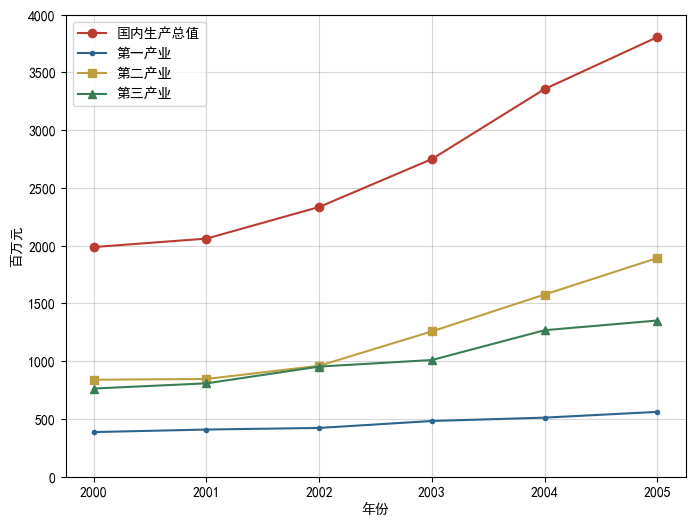

In [3]:
years = df['年份'].to_list()
x = np.arange(len(years))

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.figure(figsize=(8, 6))
plt.plot(x, df['国内生产总值'].to_numpy(), label='国内生产总值', marker='o', c='#ba3b30')
plt.plot(x, df['第一产业'].to_numpy(), label='第一产业', marker='.', c='#2b648d')
plt.plot(x, df['第二产业'].to_numpy(), label='第二产业', marker='s',c='#bd9f41')
plt.plot(x, df['第三产业'].to_numpy(), label='第三产业', marker='^', c='#387d54')
plt.legend()
plt.grid(True, alpha=0.5)
plt.xticks(x, years)
plt.yticks(np.arange(0, 4500, 500))
plt.xlabel('年份')
plt.ylabel('百万元')
plt.show()

#### Step2: 确定分析序列
- 母序列（参考数列、母指标）：能反映系统行为特征的数据序列，类似于回归中的因变量Y
- 子序列（比较数列、子指标）：影响系统行为的因素组成的序列，类似于回归中的自变量X
- 本例中，母序列为国内生产总值 (x0)，子序列为第一、二、三产业（x1, x2, x3）

#### Step3: 简单数据预处理
目的：去除量纲，同时缩小变量范围简化计算

操作：先求出每个指标的均值，再用该指标中的每个元素除以其均值

In [5]:
import numpy as np

X = df[['国内生产总值', '第一产业', '第二产业', '第三产业']].to_numpy()
Z = X / np.mean(X, axis=0)
Z

array([[0.73195876, 0.83610108, 0.68276143, 0.7439064 ],
       [0.75883652, 0.88375451, 0.68845789, 0.78778031],
       [0.85972018, 0.91407942, 0.78122881, 0.92915177],
       [1.01251841, 1.04404332, 1.02373525, 0.98472538],
       [1.23564065, 1.10685921, 1.28333107, 1.23626909],
       [1.40132548, 1.21516245, 1.54048556, 1.31816705]])

#### Step4: 计算子序列中各个指标与母序列的关联系数
![alt text](image-1.png)
![alt text](image-2.png)

In [ ]:
col = [0] # 母系列所在位置
assert len(col) == 1
dis = np.delete(np.abs(Z - Z[:, col]), col, axis=1)
a = (np.min(dis, axis=0)).min()
b = (np.max(dis, axis=0)).max()
p = 0.5
gamma = (a + p * b) / (dis + p * b)
gamma

array([[0.4751452 , 0.6586359 , 0.89222807],
       [0.42986317, 0.57328932, 0.76795519],
       [0.63557702, 0.54618164, 0.57663015],
       [0.75204756, 0.89847974, 0.7752663 ],
       [0.42237767, 0.66568635, 1.        ],
       [0.33558385, 0.40350205, 0.53171804]])

#### Step5: 计算子序列和母序列的灰色关联度
![alt text](image-3.png)

In [ ]:
np.mean(gamma, axis=0)
# 第三产业灰色关联值最高，因此国内生产总值受到第三产业影响最大

array([0.50843241, 0.62429583, 0.75729962])

In [ ]:
def GreyColleration(Z, col=[0], p=0.5):
    assert len(col) == 1
    dis = np.delete(np.abs(Z - Z[:, col]), col, axis=1)
    a = (np.min(dis, axis=0)).min()
    b = (np.max(dis, axis=0)).max()
    p = 0.5
    gamma = (a + p * b) / (dis + p * b)
    return np.mean(gamma, axis=0)
GreyColleration(Z)

array([0.50843241, 0.62429583, 0.75729962])

#### 再思考
![alt text](image-4.png)

### 应用二：综合评价
虚构母序列：每个指标的最大值（找最能影响最理想方案的指标）
计算各个指标与母序列的灰色关联度：r1 r2 ... rm
![alt text](image-5.png)

对两种评价结果进行可视化对比
![alt text](image-6.png)